In [6]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize

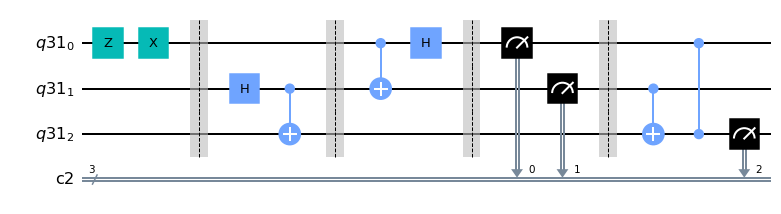

In [10]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
qc.z(0)
qc.x(0)
qc.barrier()
qc.h(1)
qc.cx(1, 2)
qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)
qc.barrier()
qc.cx(1, 2)
qc.cz(0, 2)
qc.measure(2, 2)
qc.draw()

In [11]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1024)
print(job.job_id())
job_monitor(job)

ibmqfactory.load_account:WARNING:2022-07-31 17:07:41,629: Credentials are already in use. The existing account in the session will be replaced.


62e6ef8b71e107533ce1e451
Job Status: job has successfully run


{'000': 66, '001': 75, '010': 50, '011': 38, '100': 272, '101': 192, '110': 175, '111': 156}
{'110': 258, '100': 236, '101': 250, '111': 280}


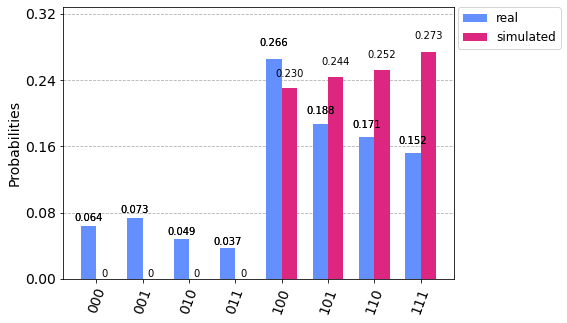

In [13]:
counts = job.result().get_counts()
simcounts = execute(qc, backend=simulator, shots=1024).result().get_counts()
print(counts)
print(simcounts)
plot_histogram([counts, simcounts], legend = ['real', 'simulated'])